# Portfolio Volatility and Asset Correlation
A correlation coefficient of 1 means that the returns of assets $A$ and $B$ move exactly in sync with each other. If $A$ goes up by a certain percentage, $B$ goes up by the same percentage, and vice versa. The volatility of the portfolio ($\sigma_p$) can be calculated using the following formula:$$\sigma_p=\sqrt{w^2_A\sigma^2_A+w^2_B\sigma^2_B+2w_Aw_BCov_{AB}}$$
where:$$Cov_{AB}=\rho_{AB}{\sigma_A\sigma_B}$$
​
The volatility of the portfolio is the average of the volatilities of $A$ and $B$. However, the volatility of a portfolio of two assets that have non-zero weights and a correlation coefficient of 0.9 is always strictly lower than the weighted average volatility of the two assets. If $A$ and $B$ are perfectly correlated, the minimum value portfolio is obtained by putting 100% of your capital in the portfolio with the lower of the two volatilities.

# The Efficient Frontier
The efficient frontier is a concept from Modern Portfolio Theory (MPT) that depicts a set of optimal portfolios that offer the highest expected return for a defined level of risk (volatility) or the lowest risk for a given level of expected return. Portfolios on the efficient frontier are considered efficient because they provide the best possible return for their level of risk. It is constructed using multiple assets, not limited to just two, and illustrates the trade-off between risk and return.

There are always two portfolios that are better than any given portfolio in the interior region of the Efficient Frontier. Straight above is a higher return for the same level of volatility and to the extreme left is the same level of return for minimum volatility.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Loading in data
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)

# Calculating the variance-covariance matrix
cov = ind['1996':'2000'].cov()

In [3]:
l = ['Food', 'Beer', 'Smoke', 'Coal']
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [4]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


The return on a portfolio is the weighted average of all the components of the portfolio. The more uncorrelated the assets are, the lower the volatility of that portfolio.

In [5]:
# Producing an array of equal weights
ew = np.repeat(0.25, 4)
erk.portfolio_return(ew, er[l])

0.19511097196038385

In [6]:
erk.portfolio_vol(ew, cov.loc[l, l])

0.055059195776437045

## Two Asset Case
Portfolio Return:$$r_p = \sum^2_{i=1}w_ir_i = w_1r_1 + w_2r_2 = w^T\mu$$

Portfolio Volatility:$$\sigma^2_p=\sum^2_{i=1}\sum^2_{j=1}w_iw_j\sigma_{ij}\\
= w_1w_1\sigma_{11} + w_1w_2\sigma_{12} + w_2w_1\sigma_{21} + w_2w_2\sigma_{22}\\
= w_1^2\sigma_{11} + 2w_1w_2\sigma_{12} + w_2^2\sigma_{22}\\
= w_1^2\sigma_{11} + w_2^2\sigma_{22} + 2w_1w_2\sigma_{12}\\
= w^TSw$$
where $$\sigma_{ij}=Cov(i,j)$$ 

and $S=\begin{bmatrix}
\sigma_{AA} & \sigma_{AB}\\
\sigma_{BA} & \sigma_{BB}
\end{bmatrix}$ is the variance-covariance matrix with variances in the diagonals.

$$S=\frac{A^TA}{M-1}$$
where $A$ is a matrix with demeaned returns of multiple stocks and $M$ is the time.

In [7]:
# Producing 20 random weight arrays such as (w1, w2) where w1 + w2 = 1
n_points = 20
weights = [np.array([w, (1 - w)]) for w in np.linspace(0, 1, n_points)]

<Axes: xlabel='V', ylabel='R'>

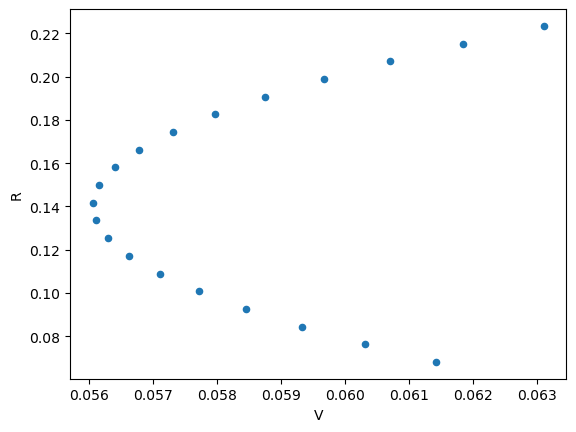

In [8]:
# Creating and plotting the efficient frontier
l = ['Games', 'Fin']
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
ef = pd.DataFrame({'R': rets, 'V': vols})
ef.plot.scatter(x='V', y='R')

<Axes: xlabel='Volatility'>

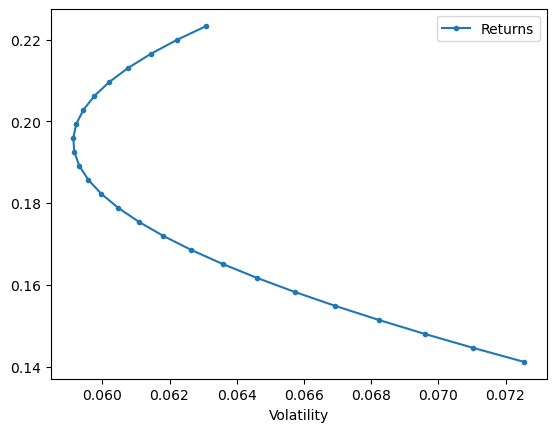

In [9]:
l = ['Fin', 'Beer']
erk.plot_ef2(25, er[l].values, cov.loc[l, l])

## Multi Asset Efficient Frontier

In order to find the **efficient frontier** recall that the portfolio on the efficient frontier is the one with the **minimum volatility for a certain level of return**.

Quadratic form:$$Minimize:\;\frac{1}{2}w^T\sum{w}$$
Subject to:
$$w^TR=r_0$$
$$w^T1=1$$
$$w\ge{0}$$

<Axes: xlabel='Volatility'>

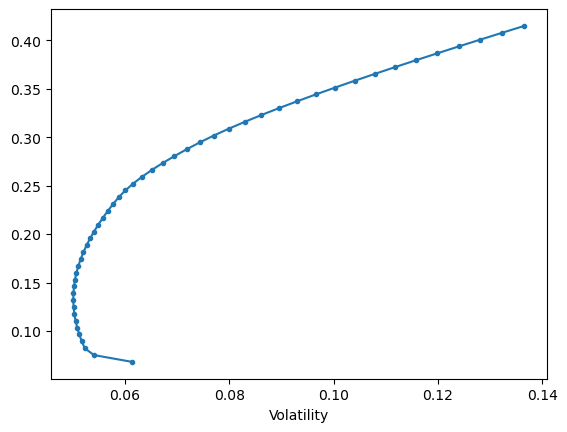

In [10]:
# plot_ef and plot_ef2 are very similar functions, only the weights calculation will be different
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(50, er[l], cov.loc[l,l])

### Tangency Portfolio
Introducing a risk-free asset changes the shape of the efficient frontier. The **tangency portfolio**, also known as the **optimal portfolio** or the **market portfolio**, is a specific portfolio that lies on the capital market line (CML) and offers the highest risk-adjusted return.

- The tangency portfolio is determined by the intersection of the efficient frontier, which represents all possible portfolios of risky assets, and the capital market line. It is the portfolio that provides the highest expected return for a given level of risk or the lowest level of risk for a given expected return.

- If a factor model is used to decompose the risk of any given portfolio in terms of specific risks and systematic risk, it can be shown that the tangency portfolio has zero exposure to specific risks. Specific risk tends not to be rewarded because it can be diversified away. Hence, the tangency portfolio is also the maximum sharpe ratio portfolio.

The tangency portfolio is significant in portfolio management as it serves as a reference point for investors to evaluate the performance of their own portfolios. Investors can compare their portfolio's risk and return characteristics to those of the tangency portfolio to determine if their portfolio is efficient or needs adjustment. Additionally, the tangency portfolio is often used as a benchmark for evaluating the performance of investment managers and mutual funds.

$$SR_p=\frac{\mu_p-r_f}{\sigma_p}=\frac{\sum^N_{i=1}w_i\mu_i-r_f}{\sqrt{\sum^N_{i,\;j=1}w_iw_j\sigma_i\sigma_j\rho_{ij}}}$$

(0.0, 0.14178366279871205)

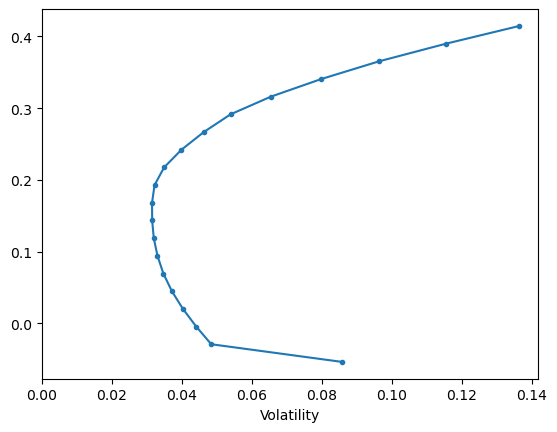

In [11]:
# Extending the x-axis to start from 0
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)

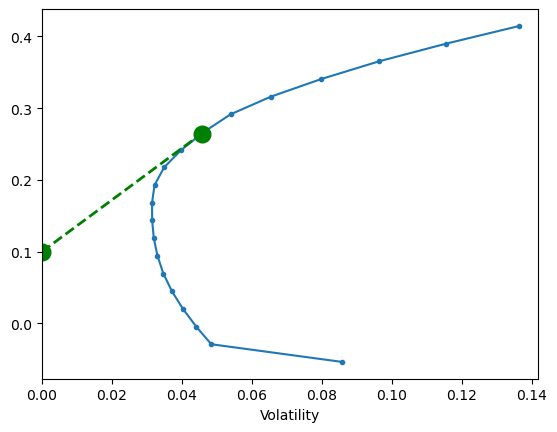

In [12]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)

# Returns the weights for the portfolio with the maximum Sharpe ratio
riskfree_rate = 0.1
weights_msr = erk.msr(riskfree_rate, er, cov)
return_msr = erk.portfolio_return(weights_msr, er)
volatility_msr = erk.portfolio_vol(weights_msr, cov)

# Adds the Capital Market Line
cml_x = [0, volatility_msr]
cml_y = [riskfree_rate, return_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

### The Capital Market Line
The **Capital Market Line (CML)** is made up of a mix of risky and risk-free assets. The CML represents the combination of a risk-free asset (such as treasury bills or government bonds) and a portfolio of risky assets (such as stocks or bonds). The risk-free asset serves as a reference point with zero risk and a known rate of return.

- The slope of the CML represents the **risk premium** or **Sharpe ratio**, which is the additional return an investor can expect to earn for taking on additional risk compared to the risk-free rate.
- The CML is derived from the **Capital Asset Pricing Model (CAPM)**, which suggests that the expected return of an asset is directly related to its systematic risk or $\beta$. According to the CAPM, investors should be compensated for taking on additional risk by earning a higher expected return.
- The CML provides a benchmark for evaluating the risk and return of a portfolio. Any portfolio lying on the CML is considered efficient because it offers the maximum expected return for a given level of risk. Portfolios that lie below the CML are considered suboptimal because they offer a lower return for the same level of risk.

The CML is an important tool for portfolio management as it helps investors determine the optimal allocation of assets in their portfolio. By diversifying their investments and constructing a portfolio that lies on the CML, investors can maximize their expected return while minimizing their risk.

In [13]:
# Return and volatility of the portfolio with the maximum Sharpe ratio
return_msr, volatility_msr

(0.2647394796334213, 0.045719731409962404)

<Axes: xlabel='Volatility'>

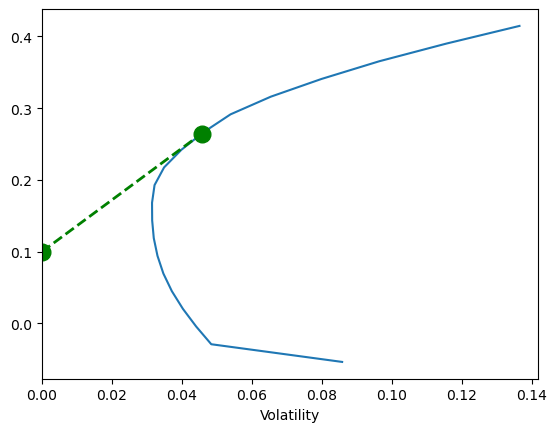

In [14]:
erk.plot_ef(20, er, cov, style='-', show_cml=True, riskfree_rate=0.1)

## Parameter Uncertainty
Expected returns and expected covariance are rarely known in advance. Estimates almost certainly contain some estimation error, and the procedure is highly sensitive to these errors, which tend to get exaggerated in the portfolio. Various methodologies exist for improving estimates for expected returns and covariance parameters. However, some uncertainty always remains which are particularly large for expected returns.

In [15]:
l = ['Food', 'Steel']
erk.msr(0.1, er[l], cov.loc[l, l])

array([0.75040362, 0.24959638])

In [16]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [17]:
# Demonstrating the sensitivity to expected return estimates
erk.msr(0.1, np.array([.11, .12]), cov.loc[l, l])

array([0.57930354, 0.42069646])

In [18]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l, l])

array([5.55111512e-17, 1.00000000e+00])

In [19]:
erk.msr(0.1, np.array([.13, .10]), cov.loc[l,l])

array([1., 0.])

## Avoiding Estimating Returns

<Axes: xlabel='Volatility'>

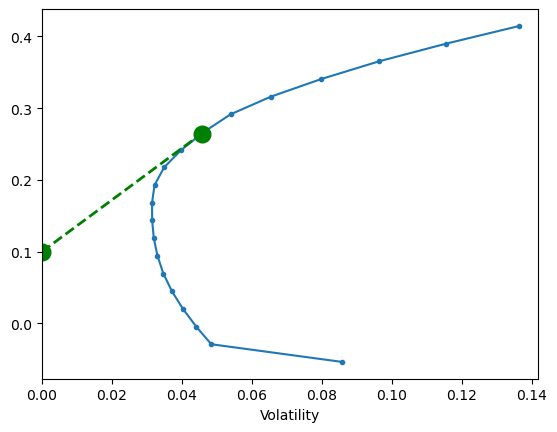

In [20]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

<Axes: xlabel='Volatility'>

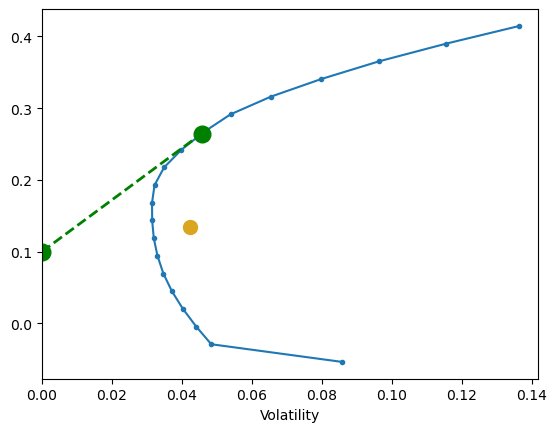

In [21]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

<Axes: xlabel='Volatility'>

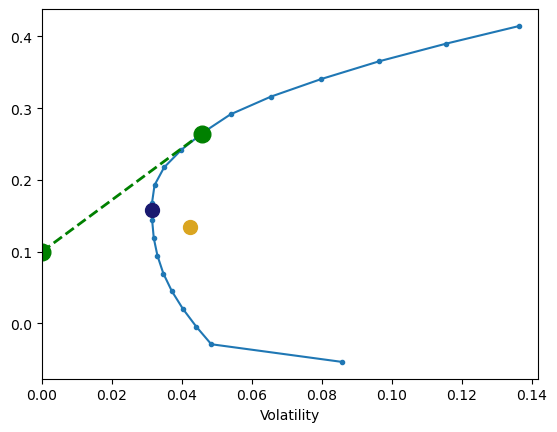

In [22]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

The **Global Minimum Variance** is the portfolio that is least sensitive to errors in parameter estimates. Since it requires no expected return estimates, it is only sensitive to errors in risk parameter estimates.  

### Lack of Robustness of Markowitz Analysis

Estimation errors can lead to extreme and unrealistic allocations in certain assets, with very strong positive or negative weights. This can result in a portfolio that is highly concentrated in a few assets, making it highly sensitive to the accuracy of the parameter estimates.

These extreme allocations can be an artifact of the estimation errors rather than a reflection of the true risk-return characteristics of the assets. To address this issue and enhance the robustness of portfolio optimization, there are a few approaches that can be taken:
- **Use more robust estimation techniques:** Employing statistical methods that are less sensitive to outliers or assumptions violations can help reduce the impact of estimation errors.
- **Consider multiple scenarios:** Instead of relying on a single set of parameter estimates, you can consider a range of plausible values for the parameters. By conducting sensitivity analysis or using techniques like Monte Carlo simulation, you can assess the potential impact of estimation errors on portfolio allocations across different scenarios.
- **Incorporate regularization techniques:** Regularization methods, such as shrinkage or Bayesian approaches, can help stabilize parameter estimates and reduce the impact of estimation errors. These techniques introduce additional constraints or prior knowledge to prevent extreme allocations.
- **Implement risk management measures:** Alongside portfolio optimization, it is crucial to incorporate risk management strategies, such as diversification, asset allocation, and risk controls, to mitigate the impact of estimation errors and ensure the portfolio remains within acceptable risk boundaries.

Obtaining accurate and reliable estimates of expected returns can be challenging, and it is a common problem in practice when implementing Markowitz Analysis. In such cases, one approach that is often used is to focus on the global minimum variance portfolio. The global minimum variance portfolio is the portfolio on the efficient frontier that has the lowest variance, without requiring any specific expected return target. It is constructed solely based on minimizing the portfolio's variance.

The global minimum variance portfolio has gained popularity in investment management across different asset classes, including equities and multi-asset portfolios. Its success is attributed to the fact that it does not rely on expected return estimates, which are known to be noisy and unreliable. By focusing solely on minimizing variance, investors can construct a portfolio that aims to achieve the lowest possible risk without considering specific return targets.

Implementing the global minimum variance portfolio offers several advantages in practice. It provides a straightforward and intuitive approach to portfolio construction, eliminating the need for accurate expected return estimates. Additionally, the global minimum variance portfolio can be appealing for risk-averse investors who prioritize minimizing portfolio risk over maximizing returns.

However, it's important to note that the global minimum variance portfolio may not necessarily provide the highest risk-adjusted return compared to portfolios that consider both expected returns and variances. It solely focuses on minimizing risk, and as a result, it may sacrifice potential returns. Therefore, it's crucial for investors to carefully assess their risk-return preferences and consider other factors, such as their investment objectives and constraints, when deciding whether to solely rely on the global minimum variance portfolio or incorporate additional considerations in their portfolio construction process.